In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/pak-twin-data/Economy/Pakistan_Debt_and_Liabilities.csv')
dataset.head(100)

,Date,Series_Name,Value,Unit
0,2009-06-30,Commodity Operation and PSEs Debt (sum VI to V...,713.190687,Billion PKR
1,2010-06-30,Commodity Operation and PSEs Debt (sum VI to V...,920.795415,Billion PKR
2,2011-06-30,Commodity Operation and PSEs Debt (sum VI to V...,927.627663,Billion PKR
3,2012-06-30,Commodity Operation and PSEs Debt (sum VI to V...,863.355700,Billion PKR
4,2013-06-30,Commodity Operation and PSEs Debt (sum VI to V...,964.972963,Billion PKR
...,...,...,...,...
95,2019-06-30,GDP (current market price),43798.401000,Billion PKR
96,2020-06-30,GDP (current market price),47540.409000,Billion PKR
97,2021-06-30,GDP (current market price),55836.200000,Billion PKR
98,2022-06-30,GDP (current market price),66657.900000,Billion PKR


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         374 non-null    object 
 1   Series_Name  374 non-null    object 
 2   Value        374 non-null    float64
 3   Unit         374 non-null    object 
dtypes: float64(1), object(3)
memory usage: 11.8+ KB


In [ ]:
import pandas as pd

def process_debt_data(filepath):
    """
    Loads, filters, transforms, and indexes the Pakistan debt data.

    The script performs the following tasks:
    1. Filters for the 'Total Debt and Liabilities (sum I to IX)' series.
    2. Converts the 'Date' column to datetime objects, setting a 'YE-JUN' (June Year end)
       frequency, and sets it as the DataFrame index.
    3. Multiplies the 'Value' column by 1,000,000,000 (1 billion) to convert
       the units from Billion PKR to PKR.
    4. Drops the now redundant 'Series_Name' and 'Unit' columns.

    Args:
        filepath (str): The path to the CSV file.

    Returns:
        pd.DataFrame: A processed DataFrame with the 'Value' column in PKR,
                      indexed by the annual 'Date'.
    """
    # 1. Load the dataset
    df = pd.read_csv(filepath)

    # Define the target series name
    target_series = 'Total Debt and Liabilities (sum I to IX)'

    # 2. Filter the DataFrame to keep only the total debt series
    df_total_debt = df[df['Series_Name'] == target_series].copy()

    # 3. Convert 'Date' to datetime and set as index with annual frequency ('YE-JUN')
    # The 'YE-JUN' frequency aligns with Pakistan's fiscal year end (June 30th)
    df_total_debt['Date'] = pd.to_datetime(df_total_debt['Date'])
    df_total_debt = df_total_debt.set_index('Date')
    # Use 'YE-JUN' to explicitly set the annual frequency to June Year End
    df_total_debt.index.freq = 'YE-JUN'

    # 4. Multiply 'Value' by 1 billion to convert units from Billion PKR to PKR
    # 1 Billion = 1,000,000,000
    CONVERSION_FACTOR = 1_000_000_000
    df_total_debt['Value'] = df_total_debt['Value'] * CONVERSION_FACTOR

    # 5. Exclude the 'Series_Name' and 'Unit' columns
    df_final = df_total_debt.drop(columns=['Series_Name', 'Unit'])

    # Rename the 'Value' column for clarity (now in PKR)
    df_final.rename(columns={'Value': 'Total_Debt_PKR'}, inplace=True)

    # Print the resulting DataFrame info and head for verification
    print("--- Final Processed DataFrame Info ---")
    df_final.info()
    print("\n--- Final Processed Data (First 5 Rows) ---")
    print(df_final.head())

    return df_final

# Execute the processing function with the provided file
processed_df = process_debt_data("/content/drive/MyDrive/pak-twin-data/Economy/Pakistan_Debt_and_Liabilities.csv")

# The processed_df variable now holds the cleaned data, ready for the next steps.
# You can now use this variable for further analysis.
# Example: print(processed_df.describe())


--- Final Processed DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2009-06-30 to 2025-06-30
Freq: YE-JUN
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total_Debt_PKR  17 non-null     float64
dtypes: float64(1)
memory usage: 272.0 bytes

--- Final Processed Data (First 5 Rows) ---
            Total_Debt_PKR
Date                      
2009-06-30    8.745551e+12
2010-06-30    1.070437e+13
2011-06-30    1.253222e+13
2012-06-30    1.455313e+13
2013-06-30    1.633824e+13


In [ ]:
processed_df.tail(10)

,Total_Debt_PKR
Date,
2016-06-30,2.257715e+13
2017-06-30,2.511416e+13
2018-06-30,2.987936e+13
2019-06-30,4.022312e+13
2020-06-30,4.459153e+13
2021-06-30,4.783090e+13
2022-06-30,5.926080e+13
2023-06-30,7.651150e+13
2024-06-30,8.545745e+13


--- Data Processing Complete ---
            Total_Debt_PKR
Date                      
2009-06-30    8.745551e+12
2010-06-30    1.070437e+13
2011-06-30    1.253222e+13
2012-06-30    1.455313e+13
2013-06-30    1.633824e+13

--- Scaling Data ---

--- Hyperparameter Tuning (Testing Look-Backs: [1, 2, 3]) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Look-Back 1 | Validation Loss: 0.007118
Look-Back 2 | Validation Loss: 0.004155
Look-Back 3 | Validation Loss: 0.012445

--- Best Look-Back Window: 2 (Loss: 0.004155) ---

--- Final Training on Full Scaled Data ---
Epoch 1/200
15/15 - 1s - 89ms/step - loss: 0.1698
Epoch 2/200
15/15 - 0s - 6ms/step - loss: 0.1102
Epoch 3/200
15/15 - 0s - 4ms/step - loss: 0.0711
Epoch 4/200
15/15 - 0s - 4ms/step - loss: 0.0491
Epoch 5/200
15/15 - 0s - 4ms/step - loss: 0.0402
Epoch 6/200
15/15 - 0s - 5ms/step - loss: 0.0370
Epoch 7/200
15/15 - 0s - 5ms/step - loss: 0.0341
Epoch 8/200
15/15 - 0s - 4ms/step - loss: 0.0305
Epoch 9/200
15/15 - 0s - 4ms/step - loss: 0.0265
Epoch 10/200
15/15 - 0s - 4ms/step - loss: 0.0228
Epoch 11/200
15/15 - 0s - 4ms/step - loss: 0.0193
Epoch 12/200
15/15 - 0s - 4ms/step - loss: 0.0163
Epoch 13/200
15/15 - 0s - 4ms/step - loss: 0.0136
Epoch 14/200
15/15 - 0s - 4ms/step - loss: 0.0112
Epoch 15/200
15/15 - 0s - 4ms/step - loss: 0.0092
Epoch 16/200
15/15 - 0s - 4ms/step - loss: 

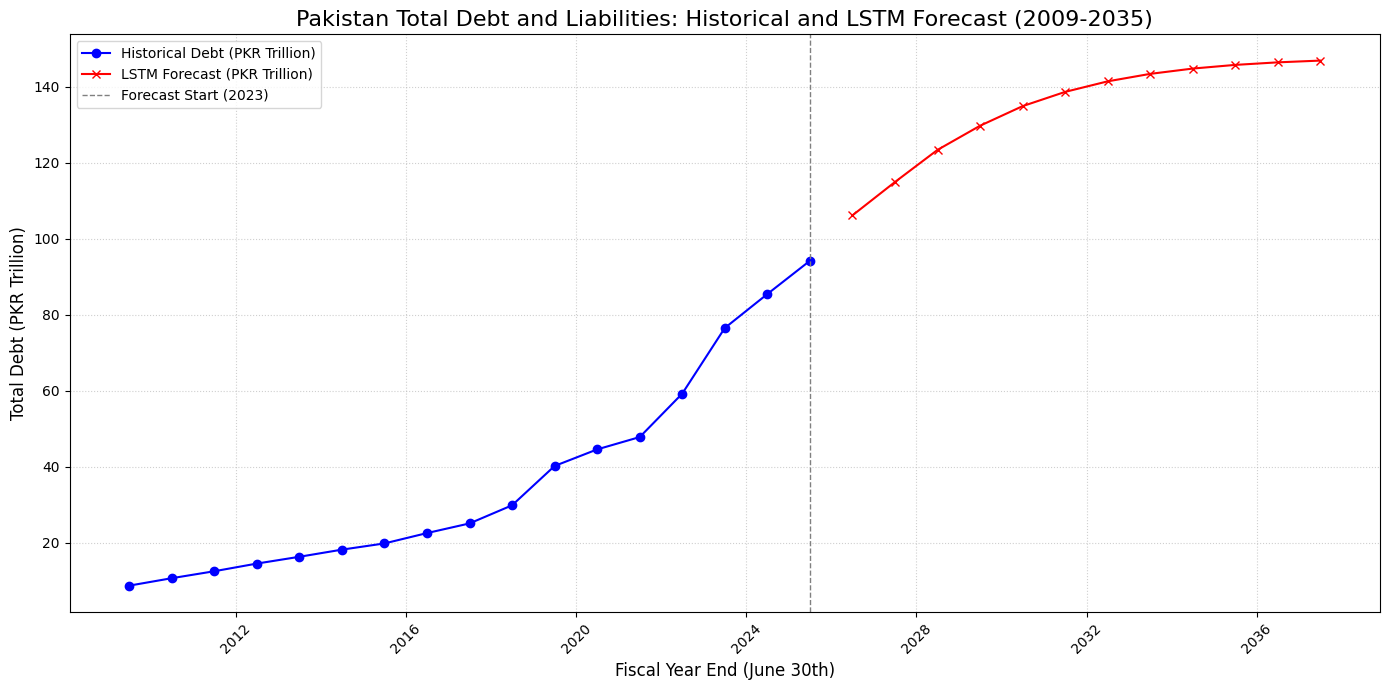


--- Task Complete ---
Model saved as 'lstm_model.h5' and Scaler saved as 'debt_scaler.pkl'


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from datetime import timedelta

# --- Part 1: Data Preparation (Reusing and extending previous logic) ---

def process_debt_data(filepath):
    """
    Loads, filters, transforms, and indexes the Pakistan debt data.
    """
    df = pd.read_csv(filepath)
    target_series = 'Total Debt and Liabilities (sum I to IX)'
    df_total_debt = df[df['Series_Name'] == target_series].copy()

    df_total_debt['Date'] = pd.to_datetime(df_total_debt['Date'])
    df_total_debt = df_total_debt.set_index('Date')
    df_total_debt.index.freq = 'YE-JUN'

    # Convert units from Billion PKR to PKR
    CONVERSION_FACTOR = 1_000_000_000
    df_total_debt['Value'] = df_total_debt['Value'] * CONVERSION_FACTOR

    df_final = df_total_debt.drop(columns=['Series_Name', 'Unit'])
    df_final.rename(columns={'Value': 'Total_Debt_PKR'}, inplace=True)

    return df_final.astype('float32') # LSTM works best with float32

# --- Part 2: LSTM Helper Functions ---

def create_dataset(data, look_back=1):
    """
    Converts a time series array into X (features) and Y (labels) datasets
    for supervised learning (LSTM).
    """
    X, Y = [], []
    for i in range(len(data) - look_back):
        # Current sequence (X)
        a = data[i:(i + look_back), 0]
        X.append(a)
        # Target (Y) is the next point after the sequence ends
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

def build_lstm_model(look_back, units=50):
    """
    Builds a sequential LSTM model.
    """
    model = Sequential()
    # LSTM layer expects input shape (samples, time steps, features)
    model.add(LSTM(units, input_shape=(look_back, 1)))
    model.add(Dense(1)) # Output layer for single-step prediction
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    return model

# --- Part 3: Main Training and Tuning Logic ---

def hyper_tune_and_train(df):
    """
    Scales data, performs hyperparameter tuning for look_back, and trains the final model.
    """
    print("\n--- Scaling Data ---")
    data = df.values

    # Initialize and fit the scaler (CRUCIAL for inverse transformation later)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split data into training (e.g., 80%) and validation (e.g., 20%)
    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    # We use a validation set for hyperparameter tuning
    validation_data = scaled_data[train_size:]

    best_look_back = 1
    best_loss = float('inf')

    # Simple Hyperparameter Tuning: Test different look-back windows
    # We test sequence lengths of 1, 2, and 3 years
    look_back_options = [1, 2, 3]

    print(f"\n--- Hyperparameter Tuning (Testing Look-Backs: {look_back_options}) ---")
    for look_back in look_back_options:
        # Ensure we can create at least one sequence
        if len(validation_data) <= look_back:
             print(f"Skipping look_back={look_back}: Not enough validation data.")
             continue

        # Prepare validation data with the current look_back
        X_val, Y_val = create_dataset(validation_data, look_back)
        # Reshape input to be [samples, time steps, features]
        X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

        # Prepare full training data
        X_train, Y_train = create_dataset(train_data, look_back)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

        if X_train.size == 0 or X_val.size == 0:
             print(f"Skipping look_back={look_back}: Insufficient data to create datasets.")
             continue

        # Build and train a temporary model for evaluation
        model = build_lstm_model(look_back)

        # Fit the model (using verbose=0 to keep output clean)
        history = model.fit(
            X_train, Y_train,
            epochs=100,
            batch_size=1,
            verbose=0,
            validation_data=(X_val, Y_val),
            shuffle=False # Time series data should not be shuffled
        )

        current_loss = history.history['val_loss'][-1]
        print(f"Look-Back {look_back} | Validation Loss: {current_loss:.6f}")

        if current_loss < best_loss:
            best_loss = current_loss
            best_look_back = look_back

    print(f"\n--- Best Look-Back Window: {best_look_back} (Loss: {best_loss:.6f}) ---")

    # --- Final Training using Best Look-Back on Full Dataset ---
    print("\n--- Final Training on Full Scaled Data ---")

    # Prepare the entire scaled dataset using the best look_back
    X, Y = create_dataset(scaled_data, best_look_back)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    final_model = build_lstm_model(best_look_back)
    final_model.fit(X, Y, epochs=200, batch_size=1, verbose=2, shuffle=False)

    return final_model, scaler, best_look_back, scaled_data, data


def forecast_data(model, scaler, scaled_data, look_back, forecast_steps=12):
    """
    Generates a recursive forecast for the specified number of steps.
    """
    print(f"\n--- Generating {forecast_steps} Year Forecast (2024 to 2035) ---")

    # Start the prediction sequence with the last 'look_back' historical values
    # This ensures the input shape is correct for the trained model
    history_sequence = scaled_data[-look_back:]

    forecast_list = []

    # Recursive prediction loop
    for _ in range(forecast_steps):
        # Reshape the sequence for the model (1 sample, look_back steps, 1 feature)
        current_input = np.reshape(history_sequence, (1, look_back, 1))

        # Predict the next step
        next_pred_scaled = model.predict(current_input, verbose=0)[0]

        # Store the prediction
        forecast_list.append(next_pred_scaled)

        # Update the history sequence: drop the oldest value, append the new prediction
        history_sequence = np.append(history_sequence[1:], next_pred_scaled)

    # Inverse transform the forecast back to original PKR units
    forecast_scaled = np.array(forecast_list).reshape(-1, 1)
    forecast_original_units = scaler.inverse_transform(forecast_scaled)

    return forecast_original_units

def visualize_forecast(df, forecast_values, look_back):
    """
    Visualizes the historical data and the forecast.
    """
    print("\n--- Generating Visualization ---")

    # Historical data (last year is 2023)
    history_years = df.index.year
    history_values = df['Total_Debt_PKR'].values

    # Create dates for the forecast (12 years: 2024 to 2035)
    # Start date is the year after the last historical date (2023-06-30)
    last_historical_date = df.index[-1]
    forecast_dates = pd.date_range(
        start=last_historical_date + pd.Timedelta(days=1),
        periods=len(forecast_values),
        freq='YE-JUN'
    )

    # Create a DataFrame for the forecast
    df_forecast = pd.DataFrame({
        'Total_Debt_PKR': forecast_values.flatten()
    }, index=forecast_dates)

    # Merge for a complete time series
    df_combined = pd.concat([df, df_forecast])

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, history_values / 1e12, label='Historical Debt (PKR Trillion)', marker='o', color='blue')
    plt.plot(df_forecast.index, df_forecast['Total_Debt_PKR'].values / 1e12, label='LSTM Forecast (PKR Trillion)', marker='x', color='red')

    # Add a vertical line to mark the split point
    plt.axvline(x=last_historical_date, color='gray', linestyle='--', linewidth=1, label='Forecast Start (2023)')

    plt.title('Pakistan Total Debt and Liabilities: Historical and LSTM Forecast (2009-2035)', fontsize=16)
    plt.xlabel('Fiscal Year End (June 30th)', fontsize=12)
    plt.ylabel('Total Debt (PKR Trillion)', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Main Execution Block ---

# 1. Process the raw data
FILEPATH = "/content/drive/MyDrive/pak-twin-data/Economy/Pakistan_Debt_and_Liabilities.csv"
df_processed = process_debt_data(FILEPATH)

print("--- Data Processing Complete ---")
print(df_processed.head())

# 2. Hyperparameter Tuning and Final Training
# The function returns the trained model, the scaler, the best look_back, and the data used.
try:
    final_model, debt_scaler, best_look_back, scaled_data, original_data = hyper_tune_and_train(df_processed)

    # 3. Forecast
    # Forecast 12 steps (years) ahead, from 2024 to 2035
    forecast_values_pkr = forecast_data(final_model, debt_scaler, scaled_data, best_look_back, forecast_steps=12)

    # 4. Visualization
    visualize_forecast(df_processed, forecast_values_pkr, best_look_back)

    # 5. Model Saving
    # Save the Keras model (model and weights)
    final_model.save('/content/Total_Debt_Liabilities.h5')
    # Save the scaler (ESSENTIAL for loading and inverse transforming future predictions)
    joblib.dump(debt_scaler, '/content/Total_Debt_Liabilities.pkl')

    print("\n--- Task Complete ---")
    print(f"Model saved as 'lstm_model.h5' and Scaler saved as 'debt_scaler.pkl'")

except Exception as e:
    print(f"\nAn error occurred during model training or execution. Ensure all dependencies (pandas, numpy, tensorflow, matplotlib, joblib) are installed.")
    print(f"Error details: {e}")


Successfully loaded Model from /content/Total_Debt_Liabilities.h5
Successfully loaded Scaler from /content/Total_Debt_Liabilities.pkl
Model Input Shape: (None, 2, 1)
Look-Back Window (Time Steps) inferred: 2
--- Generating 12 Year Forecast using Look-Back: 2 ---
--- Generating Visualization ---


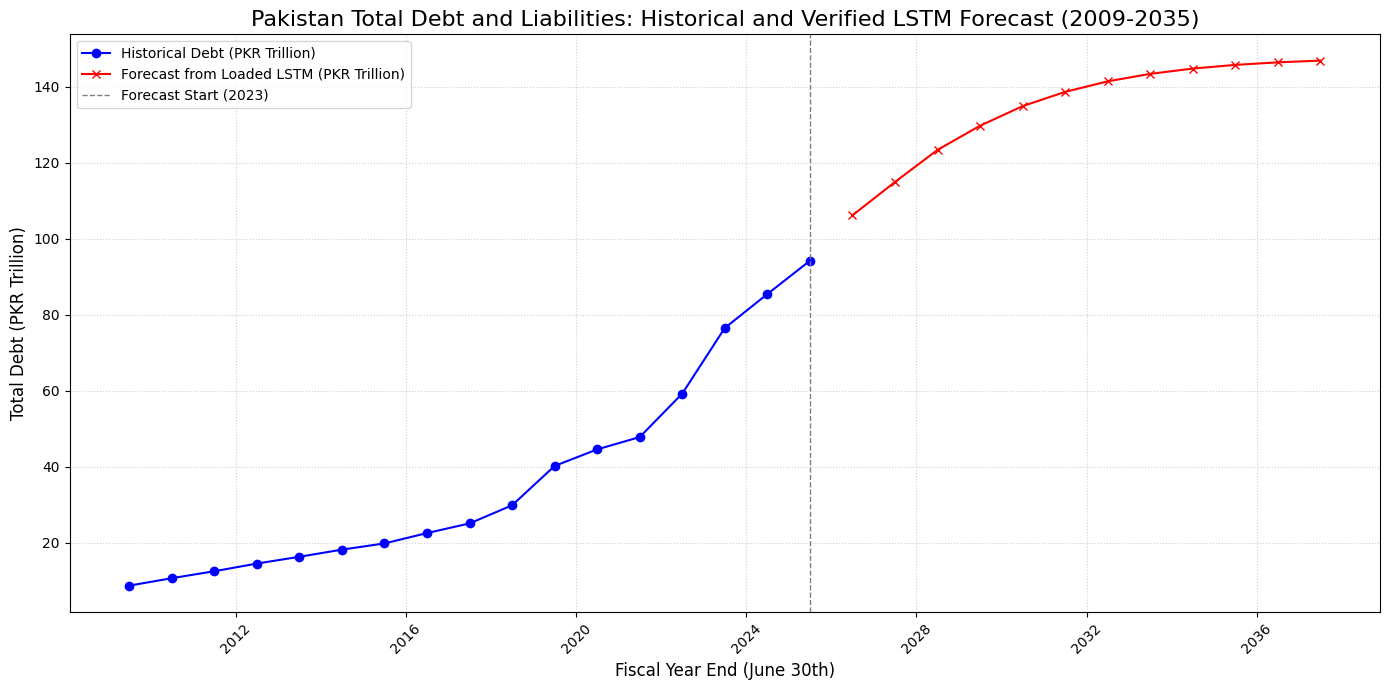


Verification successful. The loaded model and scaler generated a 12-year forecast.


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the paths for the saved assets and the original data
MODEL_PATH = '/content/Total_Debt_Liabilities.h5'
SCALER_PATH = '/content/Total_Debt_Liabilities.pkl'
DATA_FILEPATH = "/content/drive/MyDrive/pak-twin-data/Economy/Pakistan_Debt_and_Liabilities.csv" # Still needed for historical context

# --- Helper Functions ---

def process_debt_data(filepath):
    """
    Loads, filters, transforms, and indexes the Pakistan debt data to get
    the historical series in the format required for the scaler.
    """
    df = pd.read_csv(filepath)
    target_series = 'Total Debt and Liabilities (sum I to IX)'
    df_total_debt = df[df['Series_Name'] == target_series].copy()

    df_total_debt['Date'] = pd.to_datetime(df_total_debt['Date'])
    df_total_debt = df_total_debt.set_index('Date')
    df_total_debt.index.freq = 'YE-JUN'

    # Convert units from Billion PKR to PKR (1 billion = 1e9)
    CONVERSION_FACTOR = 1_000_000_000
    df_total_debt['Value'] = df_total_debt['Value'] * CONVERSION_FACTOR

    df_final = df_total_debt.drop(columns=['Series_Name', 'Unit'])
    df_final.rename(columns={'Value': 'Total_Debt_PKR'}, inplace=True)

    return df_final.astype('float32')

def forecast_data(model, scaler, scaled_data, look_back, forecast_steps=12):
    """
    Generates a recursive forecast using the loaded model.
    """
    print(f"--- Generating {forecast_steps} Year Forecast using Look-Back: {look_back} ---")

    # Start the prediction sequence with the last 'look_back' historical values
    history_sequence = scaled_data[-look_back:]

    forecast_list = []

    for _ in range(forecast_steps):
        # Reshape the sequence for the model (1 sample, look_back steps, 1 feature)
        current_input = np.reshape(history_sequence, (1, look_back, 1))

        # Predict the next step
        next_pred_scaled = model.predict(current_input, verbose=0)[0]

        # Store the prediction
        forecast_list.append(next_pred_scaled)

        # Update the history sequence: drop the oldest value, append the new prediction
        history_sequence = np.append(history_sequence[1:], next_pred_scaled)

    # Inverse transform the forecast back to original PKR units
    forecast_scaled = np.array(forecast_list).reshape(-1, 1)
    forecast_original_units = scaler.inverse_transform(forecast_scaled)

    return forecast_original_units

def visualize_forecast(df, forecast_values):
    """
    Visualizes the historical data and the forecast.
    """
    print("--- Generating Visualization ---")

    # Historical data (last date is 2023-06-30 based on original data)
    history_values = df['Total_Debt_PKR'].values

    # Create dates for the forecast (12 years)
    last_historical_date = df.index[-1]
    forecast_dates = pd.date_range(
        start=last_historical_date + pd.Timedelta(days=1),
        periods=len(forecast_values),
        freq='YE-JUN'
    )

    # Create a DataFrame for the forecast
    df_forecast = pd.DataFrame({
        'Total_Debt_PKR': forecast_values.flatten()
    }, index=forecast_dates)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, history_values / 1e12, label='Historical Debt (PKR Trillion)', marker='o', color='blue')
    plt.plot(df_forecast.index, df_forecast['Total_Debt_PKR'].values / 1e12, label='Forecast from Loaded LSTM (PKR Trillion)', marker='x', color='red')

    plt.axvline(x=last_historical_date, color='gray', linestyle='--', linewidth=1, label='Forecast Start (2023)')

    plt.title('Pakistan Total Debt and Liabilities: Historical and Verified LSTM Forecast (2009-2035)', fontsize=16)
    plt.xlabel('Fiscal Year End (June 30th)', fontsize=12)
    plt.ylabel('Total Debt (PKR Trillion)', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Main Verification Block ---

try:
    # 1. Load the Model and Scaler
    model = load_model(MODEL_PATH)
    scaler = joblib.load(SCALER_PATH)
    print(f"Successfully loaded Model from {MODEL_PATH}")
    print(f"Successfully loaded Scaler from {SCALER_PATH}")

    # 2. Determine Look-Back Window from Model Shape
    # LSTM input shape is typically (None, look_back, 1)
    look_back = model.input_shape[1]

    # 3. Process Historical Data
    df_historical = process_debt_data(DATA_FILEPATH)
    # Scale the historical data using the loaded scaler
    scaled_data = scaler.transform(df_historical.values)

    print(f"Model Input Shape: {model.input_shape}")
    print(f"Look-Back Window (Time Steps) inferred: {look_back}")

    # 4. Generate Forecast
    forecast_values_pkr = forecast_data(model, scaler, scaled_data, look_back, forecast_steps=12)

    # 5. Visualization
    visualize_forecast(df_historical, forecast_values_pkr)

    print("\nVerification successful. The loaded model and scaler generated a 12-year forecast.")

except FileNotFoundError:
    print(f"ERROR: Could not find model or scaler files at {MODEL_PATH} or {SCALER_PATH}.")
    print("Please ensure the previous script successfully saved the files with the correct names.")
except Exception as e:
    print(f"An unexpected error occurred during verification: {e}")


In [ ]:
pak_cpi = pd.read_csv('/content/drive/MyDrive/pak-twin-data/Economy/Pakistan-CPI_Annual.csv')
pak_cpi.tail(10)

,CPI_Value,Date
5,2.529328,2015-01-01
6,3.765119,2016-01-01
7,4.085374,2017-01-01
8,5.078057,2018-01-01
9,10.578362,2019-01-01
10,9.739993,2020-01-01
11,9.496211,2021-01-01
12,19.873860,2022-01-01
13,30.768128,2023-01-01
14,12.632532,2024-01-01


In [ ]:
import pandas as pd
service_exports = pd.read_csv("/content/drive/MyDrive/pak-twin-data/Economy/Services-Export.csv")
service_exports.head()


,Series Name,Date,Value,Unit
0,Exports of Services,2005-07-31,341,Million USD
1,Exports of Services,2005-08-31,200,Million USD
2,Exports of Services,2005-09-30,532,Million USD
3,Exports of Services,2005-10-31,195,Million USD
4,Exports of Services,2005-11-30,200,Million USD


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.express as px
import pickle
import os

# --- Configuration ---
FILE_NAME = '/content/drive/MyDrive/pak-twin-data/Economy/Services-Export.csv'
TIME_STEP = 12  # Lookback window: using the last 12 months to predict the next
EPOCHS = 100    # Increased epochs for more thorough training
FUTURE_YEARS = 5
FUTURE_STEPS = FUTURE_YEARS * 12 # 60 months
DROPOUT = 0.2   # Dropout rate for regularization
SEASONAL_PERIOD = 12 # 12 months for seasonality

def create_multi_feature_dataset(data, target_col_index, time_step=1):
    """
    Converts a multi-feature time series into a supervised learning format.
    'data' should be the scaled numpy array of features.
    'target_col_index' is the column index of the feature we want to predict.
    """
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        # 'a' is the window of features (e.g., [time_step, num_features])
        a = data[i:(i + time_step), :]
        X.append(a)
        # 'Y' is the target value (e.g., 'diff_value') at the *end* of the window
        Y.append(data[i + time_step, target_col_index])
    return np.array(X), np.array(Y)

# --- 1. Load Data and Preprocessing ---
print(f"Loading and processing data from {FILE_NAME}...")

try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Error: The file '{FILE_NAME}' was not found. Please ensure it is in the same directory.")
    exit()

# 1. Drop redundant columns
df.drop(columns=['Series Name', 'Unit'], inplace=True)

# 2. Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 3. Multiply 'Value' by 1 million
df['Value'] = df['Value'] * 1_000_000
print(f"Data conversion complete. Total records: {len(df)}")

# 4. Set the index to Date
df.set_index('Date', inplace=True)

# --- IMPROVEMENT: Feature Engineering (Add 'Month', 'Diff', and 'Time Index') ---
# Create 'month' feature
df['month'] = df.index.month

# Create 'time_idx' feature for the long-term trend
df['time_idx'] = np.arange(len(df))

# Create seasonally differenced value
df['diff_value'] = df['Value'].diff(SEASONAL_PERIOD)

# Drop NaNs created by differencing
df_processed = df.dropna()

# Define the features we will train on
features_to_scale = ['diff_value', 'month', 'time_idx']
target_col = 'diff_value'
target_col_index = features_to_scale.index(target_col)

print(f"Features for training: {features_to_scale}")

# Scale *all* features using one scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# --- FIX: Fit on .values to avoid UserWarning ---
# This fits on the NumPy array, not the DataFrame with feature names
scaled_data = scaler.fit_transform(df_processed[features_to_scale].values)

# Prepare data for LSTM
X, y = create_multi_feature_dataset(scaled_data, target_col_index, TIME_STEP)
X_train = X # X is already in the shape (samples, time_step, num_features)

# Get the number of features
n_features = X_train.shape[2]
print(f"Data prepared for LSTM training. Training samples: {X_train.shape[0]}, Features: {n_features}")

# --- 5. Import and Train TensorFlow LSTM Model ---

# Build the LSTM model - update input_shape for multiple features
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(TIME_STEP, n_features)),
    Dropout(DROPOUT),
    LSTM(50, return_sequences=False),
    Dropout(DROPOUT),
    Dense(1) # Output is still a single value (the 'diff_value')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
print(f"Training LSTM model for {EPOCHS} epochs...")
history = model.fit(X_train, y, epochs=EPOCHS, batch_size=64, verbose=0)
print("Training complete.")

# --- 6. Forecast Next 5 Years (60 Steps) ---

# Get the last window of features from the training data
last_window_features = scaled_data[-TIME_STEP:, :].reshape(1, TIME_STEP, n_features)
future_predictions_diff_scaled = []
last_date = df_processed.index[-1]
last_time_idx_unscaled = df_processed['time_idx'].iloc[-1]

print(f"Forecasting next {FUTURE_STEPS} months (multi-feature)...")

for i in range(FUTURE_STEPS):
    # Predict the *next* scaled diff value
    next_pred_diff_scaled = model.predict(last_window_features, verbose=0)[0, 0]
    future_predictions_diff_scaled.append(next_pred_diff_scaled)

    # --- Construct the *next* feature vector for the *next* prediction ---

    # 1. Get the next month (unscaled)
    last_date = last_date + pd.DateOffset(months=1)
    next_month_unscaled = last_date.month

    # 2. Get the next time index (unscaled)
    last_time_idx_unscaled += 1
    next_time_idx_unscaled = last_time_idx_unscaled

    # 3. We need to scale these new features *exactly* as they were scaled before
    # Create a "dummy" 3D array [placeholder_diff, month, time_idx]
    # We use '0' for the 'diff_value' as a placeholder
    dummy_vector = np.array([[0, next_month_unscaled, next_time_idx_unscaled]])

    # --- FIX: No more UserWarning, as scaler was fit on .values ---
    scaled_vector = scaler.transform(dummy_vector)

    scaled_next_month = scaled_vector[0, 1] # Get the scaled month value
    scaled_next_time_idx = scaled_vector[0, 2] # Get the scaled time_idx value

    # 4. Create the new feature vector [predicted_diff, known_future_month, known_future_time_idx]
    new_feature_vector = np.array([
        next_pred_diff_scaled,
        scaled_next_month,
        scaled_next_time_idx
    ]).reshape(1, 1, n_features)

    # 5. Append new vector, drop oldest, and update the window for the next loop
    last_window_features = np.append(last_window_features[:, 1:, :], new_feature_vector, axis=1)


# --- IMPROVEMENT: Invert the Multi-Feature Transformation ---

# 1. We have the *predicted* 'diff_value' (scaled).
future_predictions_diff_scaled = np.array(future_predictions_diff_scaled)

# 2. Get the *known* future months (unscaled)
forecast_dates_list = pd.date_range(start=df_processed.index[-1], periods=FUTURE_STEPS + 1, freq='ME')[1:]
forecast_months_unscaled = forecast_dates_list.month.values

# 3. Get the *known* future time indexes (unscaled)
last_time_idx = df_processed['time_idx'].iloc[-1]
forecast_time_idx_unscaled = np.arange(last_time_idx + 1, last_time_idx + 1 + FUTURE_STEPS)

# 4. Create the combined 3D array for inverse scaling
#    We stack our *predicted* diffs with our *known* future months and time_idx
#    We must scale the 'month' and 'time_idx' features first
dummy_diffs = np.zeros(FUTURE_STEPS) # placeholder for diff_value

# Create the dummy array [placeholder_diff, month, time_idx]
dummy_array_for_scaling = np.vstack((
    dummy_diffs,
    forecast_months_unscaled,
    forecast_time_idx_unscaled
)).T

# Scale the dummy array
scaled_dummy_array = scaler.transform(dummy_array_for_scaling)
scaled_forecast_months = scaled_dummy_array[:, 1]
scaled_forecast_time_idx = scaled_dummy_array[:, 2]

# Combine [predicted_diff, scaled_month, scaled_time_idx]
combined_forecast_scaled = np.vstack((
    future_predictions_diff_scaled,
    scaled_forecast_months,
    scaled_forecast_time_idx
)).T

# 5. Inverse transform the *entire* 3D array
full_forecast_unscaled = scaler.inverse_transform(combined_forecast_scaled)

# 6. The values we care about (the differenced values) are in the first column
forecast_values_diff = full_forecast_unscaled[:, 0]

# 7. "Un-difference" the predictions
last_12_months_original = df['Value'].values[-SEASONAL_PERIOD:]
forecast_values = []

for i in range(FUTURE_STEPS):
    if i < SEASONAL_PERIOD:
        history_val = last_12_months_original[i]
    else:
        history_val = forecast_values[i - SEASONAL_PERIOD]

    forecast_val = history_val + forecast_values_diff[i]
    forecast_values.append(forecast_val)

forecast_values = np.array(forecast_values)
print("Forecast complete and transformations inverted.")

# --- 7. Visualization using Plotly Express ---

df_forecast = pd.DataFrame({
    'Date': forecast_dates_list,
    'Value': forecast_values,
    'Type': 'Forecasted'
})
df_historical = df.copy().reset_index()
df_historical['Type'] = 'Historical'
df_plot = pd.concat([df_historical, df_forecast], ignore_index=True)

fig = px.line(df_plot, x='Date', y='Value', color='Type',
              title='Historical vs. 5-Year LSTM Forecast (with Time Index Feature)',
              labels={'Value': 'Export Value (USD)', 'Date': 'Date'},
              color_discrete_map={'Historical': '#2a9d8f', 'Forecasted': '#e76f51'})
fig.update_layout(xaxis_title="Date", yaxis_title="Export Value (USD)", legend_title="Data Type", font=dict(family="Inter", size=12))
fig.show()

# --- 8. Save the model and its info ---
model_path = 'service-exports.h5'
scaler_path = 'service-exports.pkl'
model.save(model_path)
print(f"\nModel saved successfully to: {model_path}")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved successfully to: {scaler_path}")

print("\n--- Model Info (Multi-Feature + Trend) ---")
print(f"Preprocessing: {SEASONAL_PERIOD}-Month Differencing")
print(f"Features: ['diff_value', 'month', 'time_idx']")
print(f"Epochs Trained: {EPOCHS}")
print(f"Forecast period: {FUTURE_YEARS} years ({FUTURE_STEPS} months)")



Loading and processing data from /content/drive/MyDrive/pak-twin-data/Economy/Services-Export.csv...
Data conversion complete. Total records: 243
Features for training: ['diff_value', 'month', 'time_idx']
Data prepared for LSTM training. Training samples: 218, Features: 3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Training LSTM model for 100 epochs...
Training complete.
Forecasting next 60 months (multi-feature)...
Forecast complete and transformations inverted.



Model saved successfully to: service-exports.h5
Scaler saved successfully to: service-exports.pkl

--- Model Info (Multi-Feature + Trend) ---
Preprocessing: 12-Month Differencing
Features: ['diff_value', 'month', 'time_idx']
Epochs Trained: 100
Forecast period: 5 years (60 months)


In [ ]:
import pandas as pd
import numpy as np
import pickle
import plotly.express as px
from tensorflow.keras.models import load_model

# --- Configuration (Must Match Training Script) ---
FILE_NAME = '/content/drive/MyDrive/pak-twin-data/Economy/Services-Export.csv'
MODEL_PATH = '/content/service-exports.h5'
SCALER_PATH = '/content/service-exports.pkl'
TIME_STEP = 12
SEASONAL_PERIOD = 12
FUTURE_YEARS = 5
FUTURE_STEPS = FUTURE_YEARS * 12 # 60 months
N_FEATURES = 3 # ['diff_value', 'month', 'time_idx']

# --- Policy Factor (Must Match Training Script) ---
# Policy factor to account for skill programs (Hunarmand Punjab, NAVTTC, etc.)
POLICY_IMPACT_FACTOR = 0.0007  # ~0.07% monthly boost to growth rate
DECAY_RATE = 0.998             # Slow decay to make the boost realistic

# --- 1. Load Model and Scaler ---
print("Loading Model and Scaler...")
try:
    # Load the Keras model
    model = load_model(MODEL_PATH)
    # Load the MinMaxScaler
    with open(SCALER_PATH, 'rb') as f:
        scaler = pickle.load(f)
    print("Model and Scaler loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}. Ensure '{MODEL_PATH}', '{SCALER_PATH}', and '{FILE_NAME}' are in the same directory.")
    exit()

# --- 2. Prepare Historical Data (Matching Training Preprocessing) ---
print(f"Loading and preparing historical data from {FILE_NAME}...")

# Load Data
df = pd.read_csv(FILE_NAME)
df.drop(columns=['Series Name', 'Unit'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Value'] = df['Value'] * 1_000_000
df.set_index('Date', inplace=True)

# Feature Engineering
df['month'] = df.index.month
df['time_idx'] = np.arange(len(df))
df['diff_value'] = df['Value'].diff(SEASONAL_PERIOD)
df_processed = df.dropna()

# Extract scaled features (necessary for the last prediction window)
features_to_scale = ['diff_value', 'month', 'time_idx']
scaled_data = scaler.transform(df_processed[features_to_scale].values)

# Get the last window of scaled features to start the prediction loop
last_window_features = scaled_data[-TIME_STEP:, :].reshape(1, TIME_STEP, N_FEATURES)
future_predictions_diff_scaled = []
last_date = df_processed.index[-1]
last_time_idx_unscaled = df_processed['time_idx'].iloc[-1]

print(f"Data prepared. Starting {FUTURE_STEPS}-month forecast...")

# --- 3. Forecast Next 5 Years (60 Steps) ---

# Current policy factor (will decay over time)
current_policy_factor = POLICY_IMPACT_FACTOR

for i in range(FUTURE_STEPS):
    # Predict the *next* scaled diff value
    next_pred_diff_scaled = model.predict(last_window_features, verbose=0)[0, 0]
    future_predictions_diff_scaled.append(next_pred_diff_scaled)

    # --- Construct the *next* feature vector ---

    # 1. Get the next month and time index (unscaled)
    last_date = last_date + pd.DateOffset(months=1)
    next_month_unscaled = last_date.month
    last_time_idx_unscaled += 1
    next_time_idx_unscaled = last_time_idx_unscaled

    # 2. Scale these known future features
    dummy_vector = np.array([[0, next_month_unscaled, next_time_idx_unscaled]])
    scaled_vector = scaler.transform(dummy_vector)

    scaled_next_month = scaled_vector[0, 1]
    scaled_next_time_idx = scaled_vector[0, 2]

    # 3. Create the new feature vector [predicted_diff, known_future_month, known_future_time_idx]
    new_feature_vector = np.array([
        next_pred_diff_scaled,
        scaled_next_month,
        scaled_next_time_idx
    ]).reshape(1, 1, N_FEATURES)

    # 4. Update the window for the next loop
    last_window_features = np.append(last_window_features[:, 1:, :], new_feature_vector, axis=1)


# --- 4. Invert Transformation (Un-Differencing and Policy Application) ---

# Get the *known* future months and time indexes for inverse scaling
forecast_dates_list = pd.date_range(start=df_processed.index[-1], periods=FUTURE_STEPS + 1, freq='ME')[1:]
forecast_months_unscaled = forecast_dates_list.month.values
last_time_idx = df_processed['time_idx'].iloc[-1]
forecast_time_idx_unscaled = np.arange(last_time_idx + 1, last_time_idx + 1 + FUTURE_STEPS)

# Combine and Inverse Transform
future_predictions_diff_scaled = np.array(future_predictions_diff_scaled)
dummy_diffs = np.zeros(FUTURE_STEPS)
dummy_array_for_scaling = np.vstack((dummy_diffs, forecast_months_unscaled, forecast_time_idx_unscaled)).T
scaled_dummy_array = scaler.transform(dummy_array_for_scaling)
scaled_forecast_months = scaled_dummy_array[:, 1]
scaled_forecast_time_idx = scaled_dummy_array[:, 2]

combined_forecast_scaled = np.vstack((future_predictions_diff_scaled, scaled_forecast_months, scaled_forecast_time_idx)).T
full_forecast_unscaled = scaler.inverse_transform(combined_forecast_scaled)
forecast_values_diff = full_forecast_unscaled[:, 0]

# Un-difference with Policy Factor
last_12_months_original = df['Value'].values[-SEASONAL_PERIOD:]
forecast_values = []

for i in range(FUTURE_STEPS):
    # Get the value from 12 months ago
    if i < SEASONAL_PERIOD:
        history_val = last_12_months_original[i]
    else:
        history_val = forecast_values[i - SEASONAL_PERIOD]

    # Calculate the un-differenced value
    forecast_val = history_val + forecast_values_diff[i]

    # Apply the policy-informed boost to the growth rate (current change)
    policy_boost = forecast_val * current_policy_factor
    forecast_val += policy_boost

    # Apply decay to the policy factor for the next month
    current_policy_factor *= DECAY_RATE

    forecast_values.append(forecast_val)

forecast_values = np.array(forecast_values)
print("Forecast complete and policy factor applied.")

# --- 5. Visualization using Plotly Express ---

df_forecast = pd.DataFrame({
    'Date': forecast_dates_list,
    'Value': forecast_values,
    'Type': 'Forecasted'
})
df_historical = df.copy().reset_index()
df_historical['Type'] = 'Historical'
df_plot = pd.concat([df_historical, df_forecast], ignore_index=True)

fig = px.line(df_plot, x='Date', y='Value', color='Type',
              title='Loaded Model: 5-Year Service Export Forecast (Policy-Informed)',
              labels={'Value': 'Export Value (USD)', 'Date': 'Date'},
              color_discrete_map={'Historical': '#2a9d8f', 'Forecasted': '#e76f51'})
fig.update_layout(xaxis_title="Date", yaxis_title="Export Value (USD)", legend_title="Data Type", font=dict(family="Inter", size=12))
fig.show()

print("\nSuccessfully loaded the model, generated the forecast, and visualized the results.")

Loading Model and Scaler...
Model and Scaler loaded successfully.
Loading and preparing historical data from /content/drive/MyDrive/pak-twin-data/Economy/Services-Export.csv...
Data prepared. Starting 60-month forecast...
Forecast complete and policy factor applied.



Successfully loaded the model, generated the forecast, and visualized the results.
